# Семинар 5: PyTorch

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Сравнение **PyTorch** и **NumPy**

Можно создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [12]:
a = np.random.rand(5, 3)
a

array([[0.49001231, 0.48219531, 0.78463263],
       [0.64660819, 0.59974453, 0.85191627],
       [0.69242809, 0.79047981, 0.46839536],
       [0.43919646, 0.39380436, 0.99494301],
       [0.36451058, 0.68596978, 0.23275734]])

In [13]:
# размеры массива
a.shape

(5, 3)

In [14]:
# сложение
a + 5

array([[5.49001231, 5.48219531, 5.78463263],
       [5.64660819, 5.59974453, 5.85191627],
       [5.69242809, 5.79047981, 5.46839536],
       [5.43919646, 5.39380436, 5.99494301],
       [5.36451058, 5.68596978, 5.23275734]])

In [15]:
# матричное умножение
a @ a.T

array([[1.08827274, 1.27448127, 1.08798223, 1.18576703, 0.69201509],
       [1.27448127, 1.50355698, 1.32084925, 1.36777817, 0.84539191],
       [1.08798223, 1.32084925, 1.32370921, 1.08143305, 0.90366509],
       [1.18576703, 1.36777817, 1.08143305, 1.33788699, 0.66180993],
       [0.69201509, 0.84539191, 0.90366509, 0.66180993, 0.65759848]])

In [16]:
# среднее по колонкам
a.mean(axis = 1)

array([0.58561342, 0.699423  , 0.65043442, 0.60931461, 0.4277459 ])

In [17]:
# решейп
a.reshape(3, 5).shape

(3, 5)


1. При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [18]:
sm = np.sum(np.arange(1, 10001)**2)

In [19]:
sm

np.int64(333383335000)

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [20]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.8557, 0.9125, 0.2753],
        [0.7311, 0.7019, 0.7438],
        [0.8083, 0.3876, 0.9389],
        [0.6966, 0.4438, 0.3079],
        [0.2522, 0.2331, 0.1911]])

In [21]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [22]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [23]:
# сложение
x + 5

tensor([[5.8557, 5.9125, 5.2753],
        [5.7311, 5.7019, 5.7438],
        [5.8083, 5.3876, 5.9389],
        [5.6966, 5.4438, 5.3079],
        [5.2522, 5.2331, 5.1911]])

In [24]:
# матричное умножение
x.mm(x.t())

tensor([[1.6407, 1.4708, 1.3038, 1.0859, 0.4812],
        [1.4708, 1.5803, 1.5613, 1.0498, 0.4902],
        [1.3038, 1.5613, 1.6850, 1.0242, 0.4736],
        [1.0859, 1.0498, 1.0242, 0.7771, 0.3380],
        [0.4812, 0.4902, 0.4736, 0.3380, 0.1545]])

In [25]:
# очередное матричное умножение
torch.matmul(x, x.t())

tensor([[1.6407, 1.4708, 1.3038, 1.0859, 0.4812],
        [1.4708, 1.5803, 1.5613, 1.0498, 0.4902],
        [1.3038, 1.5613, 1.6850, 1.0242, 0.4736],
        [1.0859, 1.0498, 1.0242, 0.7771, 0.3380],
        [0.4812, 0.4902, 0.4736, 0.3380, 0.1545]])

In [26]:
# поэлементное умножение
x * x

tensor([[0.7323, 0.8326, 0.0758],
        [0.5345, 0.4926, 0.5532],
        [0.6533, 0.1502, 0.8815],
        [0.4853, 0.1970, 0.0948],
        [0.0636, 0.0544, 0.0365]])

In [27]:
# среднее по колонкам
x.mean(dim = 1)

tensor([0.6812, 0.7256, 0.7116, 0.4828, 0.2255])

In [28]:
# решейп
x.view(3,5).shape

torch.Size([3, 5])

In [29]:
# или так
x.reshape([3,5]).shape

torch.Size([3, 5])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [30]:
sm = torch.sum(torch.arange(1, 10001)**2)
sm.item()

333383335000

### 2. Создаем тензоры в **PyTorch** и изучаем базовые операции

In [31]:
# пустой тензор
x = torch.empty(5,3)
x

tensor([[8.6778e-27, 3.3548e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [32]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype = torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [33]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 7])
x

tensor([5.5000, 7.0000])

In [34]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5,3)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [35]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1)
x

tensor([[-0.0277,  0.2021, -1.0466],
        [ 0.5272,  1.2338, -0.1399],
        [ 0.5690,  0.6209, -1.8389],
        [ 1.7700,  1.1689,  1.6675],
        [-1.1259,  0.1558,  0.3209]])

In [36]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [37]:
x

tensor([[0.4372, 0.2565, 0.9227],
        [0.4516, 0.3155, 0.5155],
        [0.2421, 0.4400, 0.9703],
        [0.8181, 0.6127, 0.7283],
        [0.1247, 0.7645, 0.9934]])

In [38]:
y

tensor([[0.5694, 0.0451, 0.5707],
        [0.9853, 0.7917, 0.8599],
        [0.2079, 0.7023, 0.1189],
        [0.5915, 0.0222, 0.1256],
        [0.2409, 0.9673, 0.0751]])

In [39]:
# сложение
x + y

tensor([[1.0065, 0.3015, 1.4934],
        [1.4369, 1.1073, 1.3753],
        [0.4500, 1.1423, 1.0892],
        [1.4096, 0.6349, 0.8539],
        [0.3656, 1.7318, 1.0685]])

In [40]:
# очередное сложение
z = torch.add(x, y)

In [41]:
# наконец, ещё одно сложение!
torch.add(x, y, out = x)

tensor([[1.0065, 0.3015, 1.4934],
        [1.4369, 1.1073, 1.3753],
        [0.4500, 1.1423, 1.0892],
        [1.4096, 0.6349, 0.8539],
        [0.3656, 1.7318, 1.0685]])

In [42]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [43]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [44]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [45]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [46]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

In [47]:
#можно переводить в np и наоборот
torch.from_numpy(x.numpy())

tensor([[[1.0065, 0.3015, 1.4934],
         [1.4369, 1.1073, 1.3753],
         [0.4500, 1.1423, 1.0892],
         [1.4096, 0.6349, 0.8539],
         [0.3656, 1.7318, 1.0685]]])

**2.1** считаем производные

In [48]:
# Уравнение: y = ax + b
# Производная: y' = a

x = torch.tensor(5.0, requires_grad=True)
assert x.grad is None

y = 10 * x - 1
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 10.0


In [49]:
x = torch.tensor(np.pi, requires_grad=True)
y = torch.sin(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = -1.0


In [50]:
x = torch.tensor(8.0, requires_grad=True)
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.125


In [51]:
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.25


In [52]:
y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.375


In [53]:
x.grad.zero_()

y = torch.log(x)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = 0.125


In [54]:
x = torch.tensor(1.0, requires_grad=True)

numerator = x ** 2 - x + 1
denominator = torch.cos(torch.log(x)) ** 2
fraction = numerator / denominator
y = torch.exp(-fraction)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = -0.3678794503211975


In [55]:
x = torch.tensor([10.0, -10.0], requires_grad=True)
y = torch.dot(
    x,
    torch.tensor([2.0, 3.0])
)
y.backward()

print(f"x.grad = {x.grad}")

x.grad = tensor([2., 3.])


In [56]:
w = torch.tensor([10.0, 10.0], requires_grad=True)
x = [3.0, 5.0]
y = 100
a = torch.dot(
    w,
    torch.tensor(x)
)
Q = (y - a) ** 2
Q.backward()

print(f"w.grad = {w.grad}")

w.grad = tensor([-120., -200.])


### 3. Работаем с градиентами руками

In [57]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_34969/3350633831.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


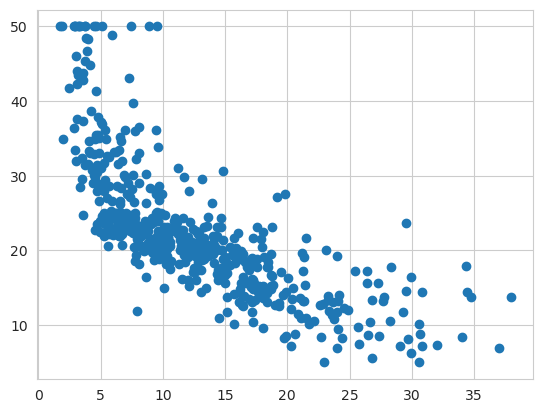

In [58]:
plt.scatter(data[:, -1], target)

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

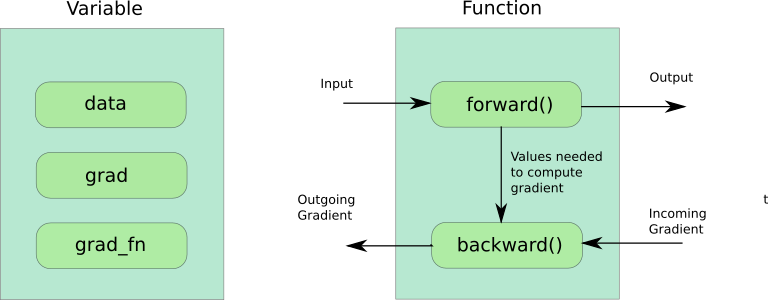

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [59]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [60]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

Создадим модель линейной регрессии и посчитаем градиент лосса

In [61]:
y_pred = w*x + b
loss = torch.mean((y_pred - y)**2)
loss.backward()

In [62]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.7733])
dL/db = tensor([-43.0050])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [63]:
w.data, w.grad

(tensor([0.1529]), tensor([-11.7733]))

In [64]:
from IPython.display import clear_output

for i in range(500):
    y_pred = w*x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data = w.data - 0.05 * w.grad
    b.data = b.data - 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.zero_()
    b.grad.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

loss =  41.19295


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования, нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


In [65]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [66]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [67]:
our_dataset = RandomDataset(x, y)

In [68]:
our_dataset.__getitem__(1)

{'sample': tensor([0.4136, 0.4146, 0.6457, 0.3066, 0.5146]),
 'target': np.float64(0.42804966856488114)}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`.

In [69]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [70]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.0932, 0.8398, 0.8336, 0.0931, 0.6052],
        [0.4136, 0.4146, 0.6457, 0.3066, 0.5146],
        [0.1937, 0.1776, 0.3058, 0.5898, 0.3476],
        [0.9643, 0.5469, 0.4335, 0.1753, 0.0093]])
Target:
tensor([0.5662, 0.4280, 0.9924, 0.0286], dtype=torch.float64)


In [71]:
from torch.utils.data import DataLoader

**Как сделать нейросеть**

Для того, чтобы в **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.


In [72]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(5, 30))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(30, 1))

another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [73]:
y_pred = model(batch["sample"])  # получили предсказания модели

In [74]:
y_pred

tensor([[0.0596],
        [0.0318],
        [0.0471],
        [0.0008]], grad_fn=<AddmmBackward0>)

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [75]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:26<00:00, 379354.05it/s] 


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 83043.65it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:13<00:00, 123467.05it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5745032.80it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



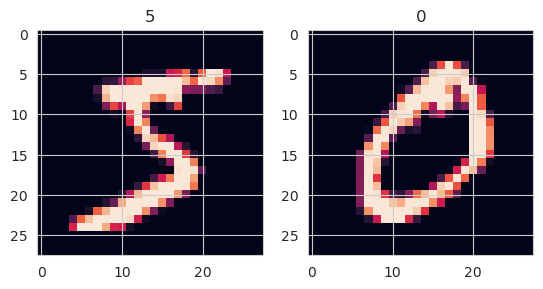

In [76]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [77]:
model = nn.Sequential(nn.Flatten(),
                     nn.Linear(28*28, 128),
                        nn.ReLU(),
                      nn.Linear(128, 10))

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Веса моделей хранятся в виде матриц и выглядят так:

In [78]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0019, -0.0278, -0.0068,  ..., -0.0208, -0.0010, -0.0053],
          [ 0.0125, -0.0192, -0.0169,  ...,  0.0255,  0.0300,  0.0225],
          [ 0.0110, -0.0310, -0.0014,  ...,  0.0334, -0.0256,  0.0131],
          ...,
          [-0.0118,  0.0178,  0.0061,  ..., -0.0075,  0.0058,  0.0246],
          [-0.0185,  0.0092, -0.0106,  ...,  0.0130,  0.0116,  0.0257],
          [ 0.0222,  0.0204,  0.0090,  ..., -0.0148, -0.0342, -0.0231]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0141,  0.0048, -0.0246, -0.0015,  0.0164,  0.0296, -0.0008, -0.0338,
           0.0220,  0.0175,  0.0101, -0.0228,  0.0342, -0.0280, -0.0119, -0.0187,
           0.0126, -0.0021,  0.0287, -0.0191,  0.0096,  0.0192,  0.0007,  0.0269,
           0.0064,  0.0225,  0.0082,  0.0059, -0.0352,  0.0301,  0.0126, -0.0069,
           0.0311,  0.0354,  0.0089, -0.0291, -0.0301, -0.0080,  0.0304, -0.0148,
           0.0254, -0.0028,  0.0340, 

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS).

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```.

In [79]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [80]:
device

device(type='cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [81]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.9940, 0.3527],
        [0.8314, 0.4764]])

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [82]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [83]:
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
          y_pred = model(x_train.to(device))# делаем предсказания
          loss = F.cross_entropy(y_pred, y_train.to(device))# считаем лосс
          loss.backward()# считаем градиенты обратным проходом
          optimizer.step()# обновляем параметры сети
          optimizer.zero_grad()# обнуляем посчитанные градиенты параметров

    val_loss = []  # сюда будем складывать **средний по бачу** лосс
    val_accuracy = []
    with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
        for x_val, y_val in tqdm(
            val_dataloader
        ):  # берем батч из валидационного лоадера
            y_pred = model(x_val.to(device))  # делаем предсказания
            loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
            val_loss.append(loss.cpu().numpy())  # добавляем в массив
            val_accuracy.extend(
                (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
            )

    # печатаем метрики
    print(
        f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
    )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.2140590399503708, accuracy: 0.9398


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 1, loss: 0.14535167813301086, accuracy: 0.9574


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.11651844531297684, accuracy: 0.9666


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 3, loss: 0.09949187189340591, accuracy: 0.9713


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08491227775812149, accuracy: 0.9747
